# Data Exploration and Analysis: Part 1

In [4]:
import numpy as np
import pandas as pd
import config_final
import requests
from sodapy import Socrata

In [5]:
#config_final.gov_key

In [6]:
df = pd.read_csv('bills93-114.csv', sep=";", encoding='latin-1')

In [7]:
df.head()

,BillID,BillNum,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,MultNo,PLaw,...,PLawDate,PLawNum,ImpBill,SubChRef,SubRankRef,Majority,ReportH,ReportS,Major,Minor
0,93-HCONRES-1,1,hconres,0,93,0.0,1973-01-03,0.0,1.0,0,...,NaN,NaN,0.0,NaN,NaN,1,0,0,NaN,NaN
1,93-HCONRES-2,2,hconres,0,93,0.0,1973-01-03,0.0,1.0,0,...,NaN,NaN,0.0,NaN,NaN,1,0,0,NaN,NaN
2,93-HCONRES-3,3,hconres,0,93,0.0,1973-01-03,0.0,1.0,0,...,NaN,NaN,0.0,NaN,NaN,1,0,0,NaN,NaN
3,93-HCONRES-4,4,hconres,0,93,0.0,1973-01-03,0.0,1.0,0,...,NaN,NaN,0.0,NaN,NaN,0,0,0,NaN,NaN
4,93-HCONRES-5,5,hconres,0,93,0.0,1973-01-03,0.0,1.0,0,...,NaN,NaN,0.0,NaN,NaN,0,0,0,NaN,NaN


In [5]:
df.shape

(294524, 48)

In [1]:
df.info()

NameError: name 'df' is not defined

In [7]:
# df.isnull().sum()

BillID             0
BillNum            0
BillType           0
Chamber            0
Cong               0
Cosponsr          39
IntrDate           0
Mult              39
MultNo            39
PLaw               0
Private            0
Title              0
Veto               0
Class         204037
ComC              39
ComR              39
CumHServ          39
CumSServ          39
Delegate           0
District          39
DW1              239
FrstConH          39
FrstConS          39
Gender             0
MemberID           2
MRef               0
NameFirst          0
NameFull           0
NameLast           0
Party             32
PooleID         1894
Postal             0
State              0
URL              188
ChRef              0
RankRef            0
PassH              0
PassS              0
PLawDate      282924
PLawNum       282534
ImpBill          188
SubChRef       53327
SubRankRef     53327
Majority           0
ReportH            0
ReportS            0
Major          56866
Minor        

# **Links to Bill URL**

**Contains**: Url links only

**Plan**: Convert all the urls into a list for webscraping bill summaries.



In [8]:
df['URL'].tail()

294519    https://www.congress.gov/bill/114th-congress/s...
294520    https://www.congress.gov/bill/114th-congress/s...
294521    https://www.congress.gov/bill/114th-congress/s...
294522    https://www.congress.gov/bill/114th-congress/s...
294523    https://www.congress.gov/bill/114th-congress/s...
Name: URL, dtype: object

In [9]:
url_list = df['URL'].to_list()
url_list[0:5]

['https://www.congress.gov/bill/93th-congress/house-concurrent-resolution/1',
 'https://www.congress.gov/bill/93th-congress/house-concurrent-resolution/2',
 'https://www.congress.gov/bill/93th-congress/house-concurrent-resolution/3',
 'https://www.congress.gov/bill/93th-congress/house-concurrent-resolution/4',
 'https://www.congress.gov/bill/93th-congress/house-concurrent-resolution/5']

# Unique Identifiers: Bill ID
    
- need to remove two duplicate entries

In [10]:
#maybe need to remoe the two bills with mulptiple IDs
df['BillID'].value_counts().head()

107-HR-5715        4
107-S-3051         2
101-HR-928         1
107-HR-3231        1
106-HCONRES-180    1
Name: BillID, dtype: int64

In [11]:
#Poole's revised ICPSR number, which is a unique ID for every Congressperson
#May not be necessary - revisit!
df['PooleID'].value_counts().head()

4812.0     1794
12042.0    1391
14503.0    1344
0.0        1307
10808.0    1200
Name: PooleID, dtype: int64

# Remove Columns:

- Private
- State
- FirstName
- LastName

In [12]:
#whether it was a "Private" bill. These no longer happend.
#Plan: DROP
df['Private'].value_counts()

0    292994
1      1530
Name: Private, dtype: int64

In [13]:
#Corresponds to a number
#Remove b/c collinearity with "Postal"
df['State'].value_counts().head()

71    27087
13    25238
49    13516
43    12672
21    12367
Name: State, dtype: int64

In [14]:
#Same as 'FullName' which will use instead
df['NameFirst']
df['NameLast']

0           O'Neill
1           Bennett
2           Bennett
3           Collier
4           Collier
5             Davis
6             Flynt
7             Green
8             Green
9            Hosmer
10           Rarick
11           Rarick
12           Rarick
13           Rarick
14           Veysey
15            Abzug
16         Annunzio
17         Annunzio
18         Annunzio
19          Collier
20            Conte
21             Fish
22            Flynt
23            Fuqua
24            Fuqua
25            Gross
26           Hosmer
27            Meeds
28         Minshall
29         Minshall
            ...    
294494       Wicker
294495       Capito
294496        Casey
294497      Shaheen
294498      Isakson
294499         Kirk
294500     Barrasso
294501        Coons
294502        Wyden
294503        Blunt
294504      Collins
294505        Brown
294506        Brown
294507       Cornyn
294508      Isakson
294509        Blunt
294510        Coons
294511       Cornyn
294512       Peters


## Add Columns:

In [15]:
#Convert date columns to DateTime
df['PLawDate'] = pd.to_datetime(df['PLawDate'], errors='coerce')
df['IntrDate'] = pd.to_datetime(df['IntrDate'], errors='coerce')

In [16]:
#create new column for time passage between intro and law date
df['time_to_passage'] = df['PLawDate'] - df['IntrDate']

In [17]:
df[['time_to_passage', 'PLawDate', 'IntrDate']].head()

,time_to_passage,PLawDate,IntrDate
0,NaT,NaT,1973-01-03
1,NaT,NaT,1973-01-03
2,NaT,NaT,1973-01-03
3,NaT,NaT,1973-01-03
4,NaT,NaT,1973-01-03


# Feature Exploration

In [18]:
#Need to explore Further to determine what this means
#HR = house of rep originated
#S = Senate originate
#
df['BillType'].value_counts()

hr         164708
s           72948
hres        19986
sres        11132
hjres        9892
hconres      9265
sjres        3829
sconres      2764
Name: BillType, dtype: int64

In [19]:
#Number corresponds to every Congress since 1974
df['Cong'].value_counts()

93     26222
94     24285
95     22313
96     14587
110    14037
111    13681
97     13231
109    13071
112    12298
98     12200
114    12043
102    12013
101    11786
99     11599
100    11275
106    10837
107    10794
108    10667
113    10636
103     9821
105     9141
104     7987
Name: Cong, dtype: int64

In [20]:
#Date of bill introduction
df['IntrDate'].head()

0   1973-01-03
1   1973-01-03
2   1973-01-03
3   1973-01-03
4   1973-01-03
Name: IntrDate, dtype: datetime64[ns]

In [21]:
#Remove - wtf is this
df['DW1'].head()

0    -0,449
1    -0,059
2    -0,059
3     0,351
4     0,351
Name: DW1, dtype: object

In [55]:
df['MRef'].head()

0    0
1    0
2    0
3    0
4    0
Name: MRef, dtype: int64

## Information on Passage of Bill

In [22]:
#Passed House: 0 is No, 1 is Yes
df['PassH'].value_counts()

0    265312
1     29212
Name: PassH, dtype: int64

In [23]:
#Pass Seante: 0 is No, 1 is Yes
df['PassS'].value_counts()

0    267944
1     26580
Name: PassS, dtype: int64

In [24]:
df['PLawDate'].isnull().value_counts()

True     282925
False     11599
Name: PLawDate, dtype: int64

In [25]:
#Presidential Veto
df['Veto'].value_counts()

0    294239
1       285
Name: Veto, dtype: int64

In [26]:
#Public law (passed both and signed)?
#1 means yes
df['PLaw'].value_counts()

0    282631
1     11893
Name: PLaw, dtype: int64

## Information on Bill Sponsorship and Introduction

In [27]:
#The number of cosponsors (most have none)
df['Cosponsr'].value_counts().head()

0.0    127722
1.0     36458
2.0     14712
3.0     11348
4.0      8133
Name: Cosponsr, dtype: int64

In [28]:
#First Congress of House service
#Maybe delete based on missing values !!!!!
df['FrstConH'].value_counts()

0.0      255068
1.0       39365
100.0         8
103.0         5
95.0          5
97.0          5
104.0         4
94.0          4
98.0          3
101.0         2
107.0         2
96.0          2
108.0         2
111.0         2
106.0         1
110.0         1
93.0          1
92.0          1
91.0          1
88.0          1
86.0          1
109.0         1
Name: FrstConH, dtype: int64

In [29]:
#refers to the numbers of terms of the congressperson introducing the bill
#Contains some Null values
df['Class'].value_counts()

1.0    32497
3.0    31092
2.0    26837
0.0       61
Name: Class, dtype: int64

In [30]:
df['NameFull'].value_counts().head(30)

Daniel Inouye       1794
Robert Roe          1391
Orrin Hatch         1344
Edward Kennedy      1200
Charles Schumer     1195
Claude Pepper       1150
J. Thurmond         1147
Robert Dole         1147
Daniel Moynihan     1057
Charles Grassley    1024
Dianne Feinstein    1018
Charles Rangel      1012
Don Young            946
Arlen Specter        945
Alan Cranston        942
Olympia Snowe        911
Fortney Stark        907
John McCain          895
Max Baucus           871
Pete Domenici        867
Christopher Dodd     849
Jesse Helms          845
Henry Heinz          844
Barbara Boxer        834
John Kerry           802
Harry Reid           800
Frank Lautenberg     787
Charles Mathias      786
John Moakley         775
Ron Wyden            768
Name: NameFull, dtype: int64

In [31]:
df['Gender'].value_counts()

0    270784
1     23740
Name: Gender, dtype: int64

In [32]:
#Use instead of 'State'
df['Postal'].value_counts().head()

CA    27087
NY    25238
TX    13516
FL    12672
IL    12367
Name: Postal, dtype: int64

In [33]:
#Party code (100 Democrat; 200 Republican, 328…from ICPSR)
df['Party'].value_counts()

100.0    172763
200.0    121717
328.0        12
Name: Party, dtype: int64

In [34]:
#Whether the intoducing member was of House majority party
#Boolean 1 or 0
df['Majority'].value_counts()

1    184941
0    109583
Name: Majority, dtype: int64

In [35]:
#0 for House, 1 for Senate
df['Chamber'].value_counts()

0    203870
1     90654
Name: Chamber, dtype: int64

In [36]:
#District of House member
df['District'].value_counts().head()

0.0    96001
2.0    19571
1.0    19157
3.0    16752
4.0    13456
Name: District, dtype: int64

In [37]:
#Chair of any committee to which the bill was referred? 
df['ChRef'].value_counts()

0    278163
1     16361
Name: ChRef, dtype: int64

In [38]:
#Boolean - Multiple referrals (1)
df['Mult'].value_counts()

0.0    251890
1.0     42595
Name: Mult, dtype: int64

In [39]:
df['ReportH'].value_counts()

0    272253
1     22271
Name: ReportH, dtype: int64

In [40]:
df['Major'].value_counts().head()

20.0    24477
3.0     22129
21.0    19996
15.0    16137
16.0    15064
Name: Major, dtype: int64

In [41]:
df['Minor'].value_counts().head()

1807.0    11519
9999.0    10603
1608.0     7664
107.0      6264
2101.0     6134
Name: Minor, dtype: int64

In [42]:
df['SubChRef'].value_counts()

0.0    230755
1.0     10442
Name: SubChRef, dtype: int64

In [43]:
df['ComC'].value_counts()

0.0    253947
1.0     40538
Name: ComC, dtype: int64

# Visualizations:

**Basic:**

In [44]:
#Visualizing passed(1) vs not passed(0)
df['PassH'].value_counts().plot.bar()


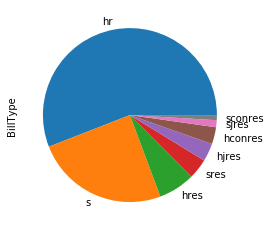

In [45]:
#Distribution of Bill Types 
#HR = House of Representatives Bill
#S = Seante Bill

df['BillType'].value_counts().plot.pie()

**Infomation by Congress:**

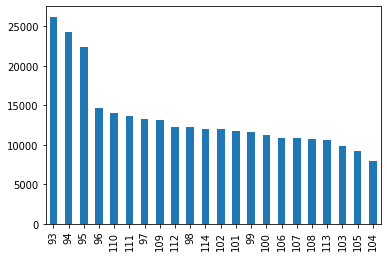

In [46]:
# df['Cong'].sort_values(ascending=True)
df['Cong'].sort_values(ascending=True).value_counts().plot.bar()

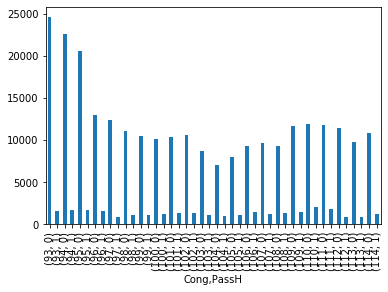

In [47]:
df.groupby(['Cong'])['PassH'].value_counts().plot.bar()

In [48]:
df.groupby(['Cong', 'Majority'])['PassH'].value_counts()

Cong  Majority  PassH
93    0         0         9311
                1          240
      1         0        15286
                1         1385
94    0         0         7334
                1          205
      1         0        15255
                1         1491
95    0         0         7021
                1          215
      1         0        13569
                1         1508
96    0         0         4642
                1          218
      1         0         8362
                1         1365
97    0         0         5045
                1          152
      1         0         7350
                1          684
98    0         0         3879
                1          191
      1         0         7239
                1          891
99    0         0         3816
                1          211
      1         0         6692
                1          880
100   0         0         3895
                1          276
                         ...  
107   1         0

In [49]:
df.groupby(['Cong', 'PassH'])['time_to_passage']


In [50]:
#groupby 

In [51]:
#post 9/11?

In [52]:
#When the house is a particular majority

**Other Exploration:**

In [53]:
df.describe()

,BillNum,Chamber,Cong,Cosponsr,Mult,MultNo,PLaw,Private,Veto,Class,...,PassS,ImpBill,SubChRef,SubRankRef,Majority,ReportH,ReportS,Major,Minor,time_to_passage
count,294524.00000,294524.000000,294524.000000,294485.000000,294485.000000,294485.000000,294524.00000,294524.000000,294524.000000,90487.000000,...,294524.000000,294336.000000,241197.000000,241197.000000,294524.000000,294524.000000,294524.000000,237658.000000,237656.000000,11599
mean,3047.82267,0.307798,102.230450,10.561645,0.144642,1.193443,0.04038,0.005195,0.000968,1.983125,...,0.090247,0.757519,0.043292,0.023242,0.627932,0.075617,0.061180,15.880698,1601.586844,222 days 16:35:25.424605
std,3353.46320,0.461583,6.849453,27.831254,0.351740,0.587313,0.19685,0.071888,0.031092,0.839739,...,0.286536,0.428585,0.203515,0.150673,0.483357,0.264385,0.239661,19.080797,1925.000453,182 days 12:27:29.469351
min,1.00000,0.000000,93.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,0 days 00:00:00
25%,603.00000,0.000000,96.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,602.000000,74 days 00:00:00
50%,2056.00000,0.000000,101.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,1304.000000,173 days 00:00:00
75%,4147.00000,1.000000,109.000000,9.000000,0.000000,1.000000,0.00000,0.000000,0.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,1906.000000,331 days 00:00:00
max,17690.00000,1.000000,114.000000,432.000000,1.000000,17.000000,1.00000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,9999.000000,735 days 00:00:00


In [54]:
#Which bill take the shortest and longest to become law
df.sort_values('time_to_passage', ).head()

,BillID,BillNum,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,MultNo,PLaw,...,PLawNum,ImpBill,SubChRef,SubRankRef,Majority,ReportH,ReportS,Major,Minor,time_to_passage
177807,105-HJRES-135,135,hjres,0,105,0.0,1998-10-14,0.0,1.0,1,...,Became Public Law No: 105-257.,1.0,NaN,NaN,1,0,0,NaN,NaN,0 days
246238,111-HJRES-38,38,hjres,0,111,0.0,2009-03-06,0.0,1.0,1,...,Became Public Law No: 111-6.,1.0,NaN,NaN,1,0,0,NaN,NaN,0 days
88210,97-HJRES-368,368,hjres,0,97,0.0,1981-11-23,0.0,1.0,1,...,Became Public Law No: 97-85.,1.0,NaN,NaN,1,0,0,NaN,NaN,0 days
81393,96-HR-7471,7471,hr,0,96,0.0,1980-05-30,0.0,1.0,1,...,Public Law 96-256.,1.0,0.0,0.0,1,0,0,1.0,105.0,0 days
117456,99-HR-3452,3452,hr,0,99,1.0,1985-09-30,1.0,2.0,1,...,Became Public Law No: 99-107.,1.0,0.0,0.0,1,0,0,3.0,341.0,0 days


In [12]:
df['IntrDate']

0         1973-01-03
1         1973-01-03
2         1973-01-03
3         1973-01-03
4         1973-01-03
5         1973-01-03
6         1973-01-03
7         1973-01-03
8         1973-01-03
9         1973-01-03
10        1973-01-03
11        1973-01-03
12        1973-01-03
13        1973-01-03
14        1973-01-03
15        1973-01-03
16        1973-01-03
17        1973-01-03
18        1973-01-03
19        1973-01-03
20        1973-01-03
21        1973-01-03
22        1973-01-03
23        1973-01-03
24        1973-01-03
25        1973-01-03
26        1973-01-03
27        1973-01-03
28        1973-01-03
29        1973-01-03
             ...    
294494    2016-09-29
294495    2016-11-16
294496    2016-11-16
294497    2016-11-17
294498    2016-11-17
294499    2016-11-17
294500    2016-11-17
294501    2016-11-29
294502    2016-11-29
294503    2016-11-29
294504    2016-11-29
294505    2016-11-30
294506    2016-11-30
294507    2016-11-30
294508    2016-12-01
294509    2016-12-01
294510    201

In [19]:
df['IntrDate'] = pd.DateTime(df['IntrDate'])
df_time = df['IntrDate']

AttributeError: module 'pandas' has no attribute 'DateTime'

In [11]:


trace = go.Histogram(
    x=df_time,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Bills Proposed Over Years',
    height=450,
    width=1200,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Bill Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

ValueError: time data '1973-01-03' does not match format '%y-%m-%d' (match)